In [41]:
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from collections import OrderedDict

In [42]:
#path = r"C:\Users\Giorgio\Documents\Data Science\ADM\HW2\Data"

pl = pd.read_json("../data/matches_England.json")
df = pd.DataFrame(pl, columns = ['gameweek','label'])
print(df)
df.sort_values(by = ['gameweek'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

     gameweek                                          label
0          38               Burnley - AFC Bournemouth, 1 - 2
1          38   Crystal Palace - West Bromwich Albion, 2 - 0
2          38             Huddersfield Town - Arsenal, 0 - 1
3          38      Liverpool - Brighton & Hove Albion, 4 - 0
4          38             Manchester United - Watford, 1 - 0
..        ...                                            ...
375         1                    Everton - Stoke City, 1 - 0
376         1              Southampton - Swansea City, 0 - 0
377         1  West Bromwich Albion - AFC Bournemouth, 1 - 0
378         1                     Watford - Liverpool, 3 - 3
379         1                Arsenal - Leicester City, 4 - 3

[380 rows x 2 columns]


,gameweek,label
0,1,"Arsenal - Leicester City, 4 - 3"
1,1,"Manchester United - West Ham United, 4 - 0"
2,1,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,"Chelsea - Burnley, 2 - 3"
...,...,...
375,38,"Southampton - Manchester City, 0 - 1"
376,38,"Swansea City - Stoke City, 1 - 2"
377,38,"West Ham United - Everton, 3 - 1"
378,38,"Newcastle United - Chelsea, 3 - 0"


In [43]:
df['team1'] = ''
df['team2'] = ''
df['score1'] = 0
df['score2'] = 0

In [44]:
for i in range(len(df)):
    df['team1'][i] = ((df['label'][i].replace(',', '-')).split('-'))[0].strip()
    df['team2'][i] = ((df['label'][i].replace(',', '-')).split('-'))[1].strip()
    p1 = ((df['label'][i].replace(',', '-')).split('-'))[2].strip()
    p2 = ((df['label'][i].replace(',', '-')).split('-'))[3].strip()
    if(int(p1) > int(p2)):
        df['score1'][i] +=  3
    elif(int(p1) == int(p2)):
        df['score1'][i] += 1
        df['score2'][i] += 1
    else:
        df['score2'][i] += 3


/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [45]:
df.iloc[[1]]

,gameweek,label,team1,team2,score1,score2
1,1,"Manchester United - West Ham United, 4 - 0",Manchester United,West Ham United,3,0


In [46]:
ars = pd.DataFrame(columns = ['gameweek', 'label', 'team1', 'team2', 'score1', 'score2'])
for i in range(len(df)):
    if bool(df.team1[i] == 'Arsenal' or df.team2[i] == 'Arsenal'):
        ars = ars.append(df.iloc[[i]])
ars

,gameweek,label,team1,team2,score1,score2
0,1,"Arsenal - Leicester City, 4 - 3",Arsenal,Leicester City,3,0
13,2,"Stoke City - Arsenal, 1 - 0",Stoke City,Arsenal,3,0
20,3,"Liverpool - Arsenal, 4 - 0",Liverpool,Arsenal,3,0
39,4,"Arsenal - AFC Bournemouth, 3 - 0",Arsenal,AFC Bournemouth,3,0
41,5,"Chelsea - Arsenal, 0 - 0",Chelsea,Arsenal,1,1
51,6,"Arsenal - West Bromwich Albion, 2 - 0",Arsenal,West Bromwich Albion,3,0
66,7,"Arsenal - Brighton & Hove Albion, 2 - 0",Arsenal,Brighton & Hove Albion,3,0
70,8,"Watford - Arsenal, 2 - 1",Watford,Arsenal,3,0
81,9,"Everton - Arsenal, 2 - 5",Everton,Arsenal,0,3
94,10,"Arsenal - Swansea City, 2 - 1",Arsenal,Swansea City,3,0


In [47]:
d = {}
for i in range(len(df)):
    if df.team1[i] not in d:
        d[df.team1[i]] = [int(df.score1[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team1[i]][df.gameweek[i]-1] += df.score1[i] + d[df.team1[i]][df.gameweek[i]-2]
    if df.team2[i] not in d:
        d[df.team2[i]] = [int(df.score2[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team2[i]][df.gameweek[i]-1] += df.score2[i] + d[df.team2[i]][df.gameweek[i]-2]
for elem in d:
    print(elem, d[elem])

Arsenal [3, 3, 3, 6, 7, 10, 13, 13, 16, 19, 19, 22, 25, 28, 28, 29, 30, 33, 34, 37, 38, 39, 39, 42, 42, 45, 45, 45, 45, 48, 48, 51, 54, 54, 57, 57, 60, 63]
Leicester City [0, 3, 3, 3, 4, 4, 5, 6, 9, 12, 13, 13, 14, 17, 20, 23, 26, 26, 27, 27, 27, 30, 31, 34, 34, 35, 35, 36, 37, 40, 43, 46, 46, 46, 47, 47, 47, 47]
Manchester United [3, 6, 9, 10, 13, 16, 19, 20, 20, 23, 23, 26, 29, 32, 35, 35, 38, 41, 42, 43, 44, 47, 50, 53, 53, 56, 56, 59, 62, 65, 66, 69, 72, 72, 75, 78, 78, 81]
West Ham United [0, 0, 0, 3, 4, 4, 7, 8, 8, 9, 9, 9, 10, 10, 10, 13, 14, 17, 17, 18, 19, 22, 25, 26, 27, 27, 30, 30, 30, 30, 31, 34, 35, 36, 36, 36, 39, 42]
Newcastle United [3, 3, 6, 9, 12, 12, 13, 14, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 21, 21, 22, 25, 26, 26, 27, 28, 31, 32, 32, 35, 35, 38, 41, 44, 44, 44, 44, 47]
Tottenham Hotspur [0, 0, 1, 4, 5, 8, 11, 14, 17, 17, 20, 20, 21, 21, 22, 25, 28, 28, 31, 34, 35, 38, 41, 42, 45, 46, 49, 52, 55, 58, 61, 64, 67, 67, 68, 71, 71, 74]
Brighton & Hove Albion [3, 3,

In [48]:
allsquad = pd.DataFrame(d)
allsquad

,Arsenal,Leicester City,Manchester United,West Ham United,Newcastle United,Tottenham Hotspur,Brighton & Hove Albion,Manchester City,Chelsea,Burnley,Watford,Liverpool,Everton,Stoke City,Southampton,Swansea City,West Bromwich Albion,AFC Bournemouth,Crystal Palace,Huddersfield Town
0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0
1,3,3,6,0,3,0,3,1,6,0,6,3,4,3,6,0,6,0,3,3
2,3,3,9,0,6,1,4,4,9,1,7,6,4,4,7,3,7,0,3,4
3,6,3,10,3,9,4,7,7,12,4,10,6,4,5,7,3,7,0,3,4
4,7,4,13,4,12,5,7,10,13,5,10,7,4,5,10,4,8,3,3,5
5,10,4,16,4,12,8,10,13,16,6,13,10,7,5,10,4,8,3,3,6
6,13,5,19,7,13,11,10,16,16,9,14,11,7,8,10,4,9,4,3,6
7,13,6,20,8,14,14,11,19,16,10,17,12,8,8,11,7,10,4,6,6
8,16,9,20,8,17,17,14,22,19,10,17,12,8,8,14,7,10,7,6,9
9,19,12,23,9,17,17,15,25,22,13,17,15,8,11,15,7,10,7,7,9


In [63]:
streak = OrderedDict()
for elem in d:
    if elem not in streak:
        streak[elem] = [0, 0]   # [win, lose] streak
    current_win = 1
    current_lose = 1
    max_win = 1
    max_lose = 1
    for i in range(1, len(d[elem])):
        if d[elem][i] == d[elem][i-1] + 3:
            current_win += 1
            if current_lose > max_lose:
                max_lose = current_lose
                current_lose = 0
        elif d[elem][i] == d[elem][i-1]:
            current_lose += 1
            if current_win > max_win:
                max_win = current_win
                current_win = 0
        else:
            if current_lose > max_lose:
                max_lose = current_lose
                current_lose = 0
            if current_win > max_win:
                max_win = current_win
                current_win = 0
        streak[elem][0] = max_win
        streak[elem][1] = max_lose
win_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][0]))   # sort by win streak
winner1 = list(win_ord)[-1]
winner2 = list(win_ord)[-2]
lose_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][1]))   # sort by win streak
loser1 = list(lose_ord)[-1]
loser2 = list(lose_ord)[-2]

print(winner1, winner2)
print(loser1, loser2)


    
    

Manchester City Tottenham Hotspur
West Bromwich Albion Crystal Palace


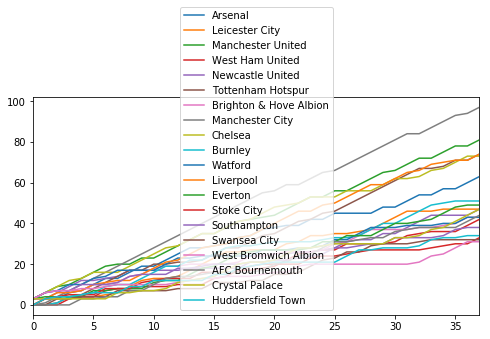

In [11]:
allsquad.plot(figsize = (8, 4))

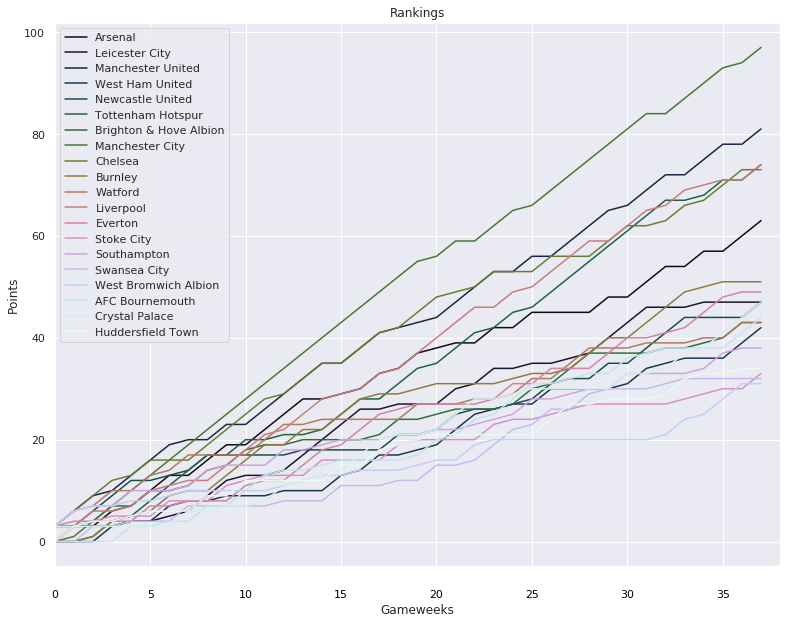

In [12]:
se.set(rc={'figure.figsize':(13, 10)})
x = se.lineplot(data = allsquad, hue = allsquad.columns, palette = 'cubehelix', style = 'choice', dashes = False)
plt.tick_params(axis='x', colors='black', direction='out', length=20, width=10)
plt.xlim(0, 38)
plt.xlabel("Gameweeks")
plt.ylabel("Points")
plt.title("Rankings") # You can comment this line out if you don't need title
plt.show(x)